In [1]:
from wl_utils import *
%pylab inline
from matplotlib import cm, colors


Populating the interactive namespace from numpy and matplotlib


/opt/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['power', 'info', 'random', 'fft', 'linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
m256 = run("./build/grigor/")
m1024 = run("./build/grigor_1024/")

In [ ]:
m64 = run("./build/test/")

In [ ]:
m1024t = run("./build_shear/test_astro/")

In [ ]:
m256 = run("./build_shear/test_pixels/")


In [2]:
def plot_image(matrix, cmap = cm.ocean, sizebar = True, text = '', norm = False, colorbar = True, useAx = None, text_start_pos = 0.4):
    N = int(np.sqrt(len(matrix)))
    matrix = matrix.reshape([N, N])

    fig = figure(figsize=(4,4), dpi=128)
    if useAx == None:
        ax = fig.add_axes([0,0,1,1])
    else:
        ax = useAx
        ax.cla()
    
    ax.set_axis_off()
    im = ax.imshow(matrix, cmap=cmap, extent=(0,1380,0,1380))
    
    if colorbar:
        fig.colorbar(im)
    
    asb =  AnchoredSizeBar(ax.transData,
                             500,
                             '500 Mpc/$h$',
                             loc=4,
                             pad=0.1, borderpad=0.5, sep=10,
                             frameon=False, color = 'white', size_vertical = 10)

    fontsize = 20
    color = 'black'
    if color is not None:
        for r in asb.size_bar.findobj(Rectangle):
            r.set_edgecolor(color)
        for t in asb.txt_label.findobj(Text):
            t.set_color(color)
    if fontsize is not None:
        for t in asb.txt_label.findobj(Text):
            t.set_fontsize(fontsize)

    if norm:
        normal = colors.Normalize(vmin=norm[0], vmax=norm[1])
        im.set_norm(normal)
    if sizebar:
        ax.add_artist(asb)
        
    if text != '':
        ax.text(text_start_pos, 0.9, text, color = 'black', fontsize = 15, transform = ax.transAxes)
    fig.tight_layout()
    return ax, im

In [ ]:
b = m1024t
plot_image(b.delta_x,norm=[-0.2,0.2],cmap=cm.seismic,colorbar=False)
plot_image(b.datax2*b.mask,norm=[-0.2,0.2],cmap=cm.seismic,colorbar=False)
plot_image(b.mask,cmap=cm.seismic,colorbar=False)
plot_image(b.delta_x_min,norm=[-0.2,0.2],cmap=cm.seismic,colorbar=False)

In [ ]:
b = m1024t
plot_image(b.delta_x,norm=[-0.2,0.2],cmap=cm.seismic,colorbar=False)
plot_image(b.gamma1_noisy*b.mask,norm=[-0.2,0.2],cmap=cm.seismic,colorbar=False)
plot_image(b.gamma2_noisy*b.mask,norm=[-0.2,0.2],cmap=cm.seismic,colorbar=False)
plot_image(b.delta_x_min,norm=[-0.2,0.2],cmap=cm.seismic,colorbar=False)

In [ ]:
plot_image(m64.sigma_noise,norm=[-0.2,0.2],cmap=cm.seismic,colorbar=False)
plot_image(m64.mask,norm=[-0.2,0.2],cmap=cm.seismic,colorbar=False)
plot_image(m64.delta_x,cmap=cm.seismic,colorbar=False)

In [ ]:
imshow(m64.fisher)
imshow(m64.fisher_est)
#imshow(m64.fisher_new_est)

In [ ]:
imshow(m64.fisher_new_est)

In [ ]:
plot_image(m1024.data*m1024.mask,text="Observed",norm=[-1,1],colorbar=False)
plot_image(m1024.delta_x_min,text="Reconstructed",norm=[-1,1],colorbar=False)
plot_image(m1024.delta_x,text="True",norm=[-1,1],colorbar=False)

In [ ]:
plot_image(m1024.gamma1_noisy*m1024.mask,cmap=cm.seismic,text="Observed Shear : $\gamma_1$",colorbar=False,norm=[-0.25,0.25],text_start_pos=0.3)
plot_image(m1024.gamma2_noisy*m1024.mask,cmap=cm.seismic,text="Observed Shear : $\gamma_2$",colorbar=False,norm=[-0.25,0.25],text_start_pos=0.3)
plot_image(m1024.delta_x_min,cmap=cm.seismic,text="Reconstructed Density",colorbar=False,norm=[-0.25,0.25],text_start_pos=0.25)
plot_image(m1024.delta_x,cmap=cm.seismic,text="True Density",colorbar=False,norm=[-0.25,0.25],text_start_pos=0.35)

In [ ]:
def P_k(a,bias=1):
    plt.plot(a.k_bins, a.actual_ps, 'g--', label = 'Model')
    plt.plot(a.k_bins, a.delta_ps, 'r', label = 'Realization')
   # plt.errorbar(a.k_bins, a.theta_est, yerr = a.theta_error, label = 'L-BFGS Reconstruction w/ Noise Bias', color = 'cyan')
    #plt.plot(a.k_bins, a.delta_min_ps*bias, 'b', label = 'best fit')
    #plt.plot(a.k_bins, a.delta_ps, 'r', label = 'initial')
    plt.errorbar(a.k_bins, a.theta, yerr = a.error, label = "WF Reconstruction w/ noise bias")
    plt.plot(a.k_bins, a.theta-a.bl, 'b--', label = 'WF Reconstruction')
    plt.legend(loc = 1)
    plt.semilogy()
    plt.ylim([0.2,5])
    plt.xlabel('$k$', fontsize = 15)
    plt.ylabel('$P(k)$', fontsize = 15)
    plt.savefig('power_spectrum_reconstructed.png')

In [ ]:
P_k(m64)
plt.plot(m64.k_bins, m64.theta-m64.bl, 'b--', label = 'WF Reconstruction')


In [ ]:
plt.plot(m64.k_bins, m64.bEst, 'b--', label = 'WF Reconstruction')
#plt.plot(m64.k_bins, m64.theta, 'b', label = 'WF Reconstruction')


In [ ]:
plot_image(m256.gamma1*m256.mask,norm = [-0.1,0.1],cmap=cm.seismic,text="gamma1")
plot_image(m256.gamma2*m256.mask,norm = [-0.1,0.1],cmap=cm.seismic,text="gamma2")

In [3]:
a = m256
bias = 1.0
plt.plot(a.k_bins, a.actual_ps, 'g--', label = 'Model')
plt.plot(a.k_bins, a.delta_ps, 'r', label = 'Realization')
plt.plot(a.k_bins, a.delta_min_ps*bias, 'b', label = 'L-BFGS Reconstruction')
plt.errorbar(a.k_bins, a.theta_est, yerr = a.theta_error, label = 'L-BFGS Reconstruction w/ Noise Bias', color = 'cyan')
#plt.plot(a.k_bins, a.delta_ps, 'r', label = 'initial')

#plt.plot(a.k_bins, a.fiducial_ps, 'b--', label = 'fiducial')
plt.legend(loc = 1)
plt.semilogy()
plt.xlabel('$k$', fontsize = 15)
plt.ylabel('$P(k)$', fontsize = 15)
plt.savefig('power_spectrum_reconstructed.png')

NameError: name 'm256' is not defined

In [3]:
m1024c = run("./build_shear_2/convergence_only/")
m1024s = run("./build_shear_2/shear/")

No WF Data!
NO!
No
no noise bias!
No fisher
No
No window
0
No
No WF Data!
NO!
No
No fisher
No
No window
0
No


/opt/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


(<matplotlib.axes._axes.Axes at 0x7f1d1362aed0>,
 <matplotlib.image.AxesImage at 0x7f1d1370b350>)

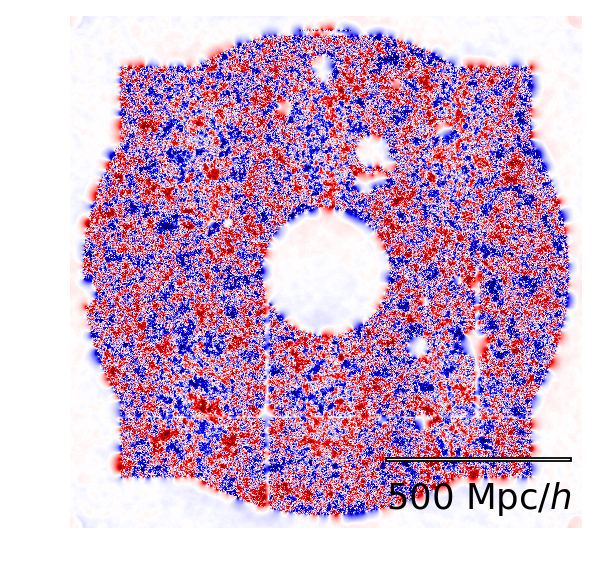

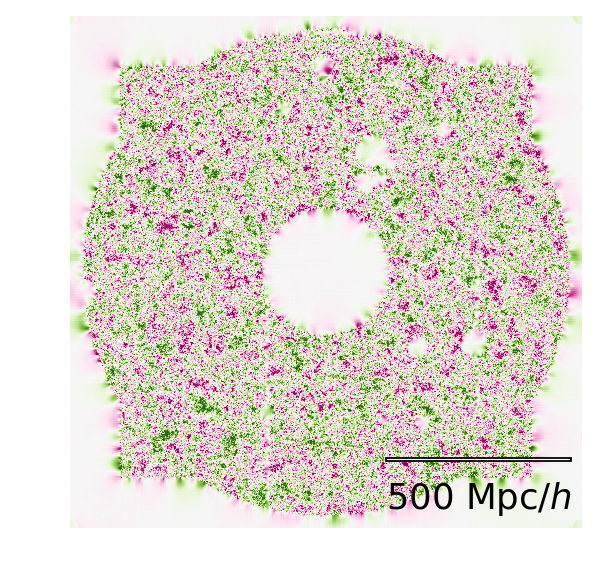

In [4]:
plot_image(m1024c.delta_x_min,norm=[-0.2,0.2],cmap=cm.seismic,colorbar=False)
plot_image(m1024s.delta_x_min,norm=[-0.2,0.2],cmap=cm.PiYG,colorbar=False)

(<matplotlib.axes._axes.Axes at 0x7f1d00462490>,
 <matplotlib.image.AxesImage at 0x7f1d00428850>)

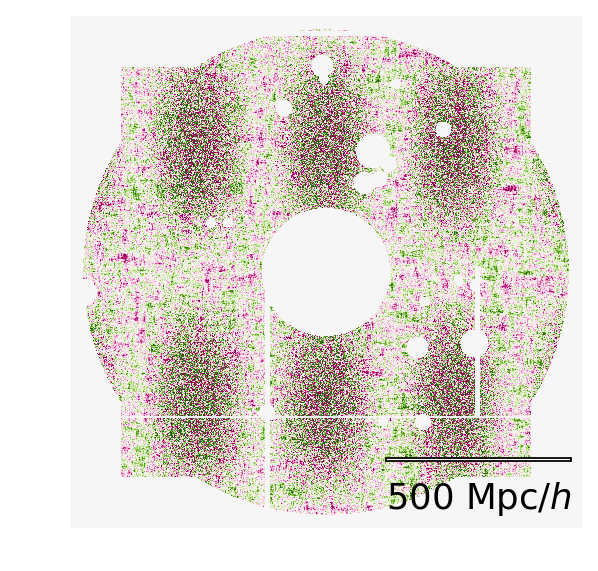

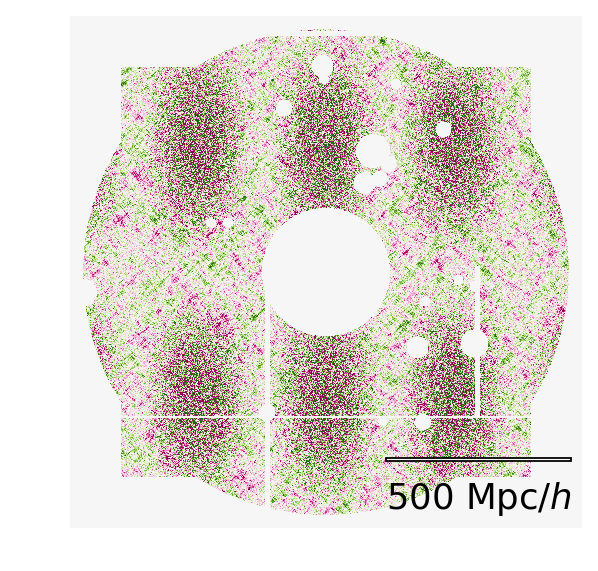

In [5]:
plot_image(m1024s.gamma1_noisy*m1024s.mask,norm=[-0.2,0.2],cmap=cm.PiYG,colorbar=False)

plot_image(m1024s.gamma2_noisy*m1024s.mask,norm=[-0.2,0.2],cmap=cm.PiYG,colorbar=False)



(<matplotlib.axes._axes.Axes at 0x7f1d00d37850>,
 <matplotlib.image.AxesImage at 0x7f1d003dba10>)

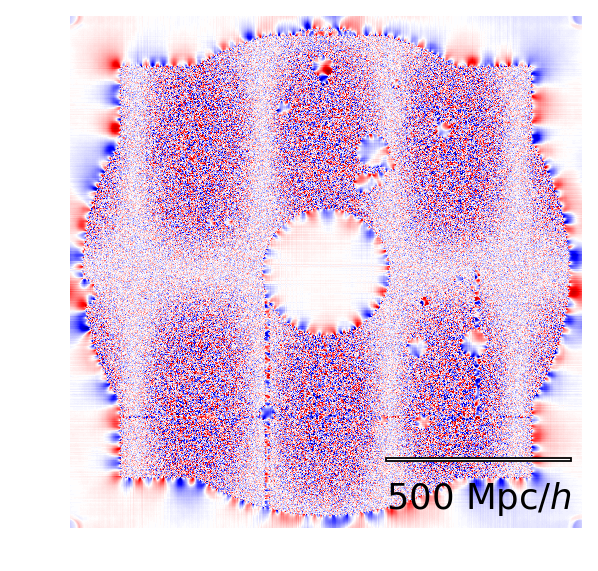

In [6]:
plot_image(m1024c.delta_x_min-m1024s.delta_x_min,norm=[-0.2,0.2],cmap=cm.seismic,colorbar=False)


[]

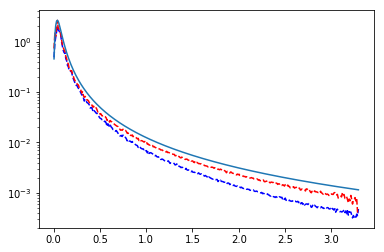

In [19]:
plt.plot(m1024c.k_bins,m1024c.delta_min_ps, "b--")
plt.plot(m1024s.k_bins,m1024s.delta_min_ps, "r--")
plt.plot(m1024s.k_bins,m1024s.actual_ps)

plt.semilogy()

In [9]:
m1024s.delta_ps-m1024c.delta_ps

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [41]:
m1024c = run("./build_shear_2/c_256//")
m1024s = run("./build_shear_2/s_256//")

No WF Data!
No
T
No
1
No WF Data!
No
T
No
1


[]

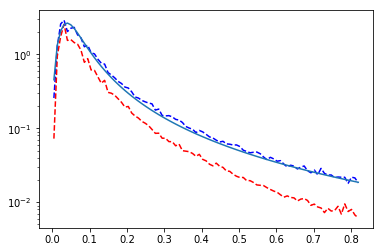

In [29]:
plt.plot(m1024c.k_bins,m1024c.delta_min_ps, "b--")
plt.plot(m1024s.k_bins,m1024s.delta_min_ps, "r--")
plt.plot(m1024s.k_bins,m1024s.actual_ps)

plt.semilogy()

[]

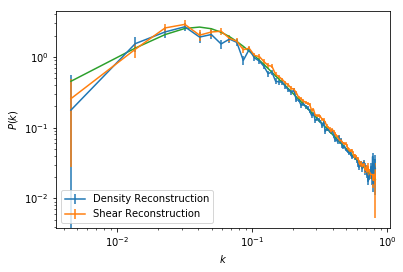

In [55]:
plt.errorbar(m1024c.k_bins,m1024c.theta_est,yerr=m1024c.theta_error,label="Density Reconstruction")
plt.errorbar(m1024s.k_bins,m1024s.delta_min_ps,yerr=m1024s.theta_error,label = "Shear Reconstruction")
plt.plot(m1024s.k_bins,m1024s.actual_ps)
plt.legend(loc=3)

plt.xlabel("$k$")
plt.ylabel("$P(k)$")

plt.loglog()

(-0.5, 0.5)

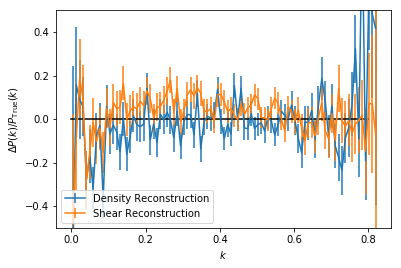

In [61]:
plt.errorbar(m1024c.k_bins,(m1024c.theta_est-m1024s.actual_ps)/m1024s.actual_ps,yerr=m1024c.theta_error/m1024s.actual_ps,label="Density Reconstruction")
plt.errorbar(m1024s.k_bins,(m1024s.delta_min_ps-m1024s.actual_ps)/m1024s.actual_ps-0.05,yerr=m1024s.theta_error/m1024s.actual_ps,label = "Shear Reconstruction")
plt.plot([0,0.8],[0,0],"black")
plt.legend(loc=3)


plt.xlabel("$k$")
plt.ylabel(r"$\Delta P(k) / P_{\rm True}(k)$")


plt.ylim([-0.5,0.5])
#plt.plot(m1024s.k_bins,m1024s.actual_ps)

In [ ]:
m1024s.delta_min_ps-m1024c.delta_min_ps